In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

In [4]:
from keras import backend as K
print(K.backend())

tensorflow


CIFAR-10 Luokitteluprojekti
Projektin tavoite
Tämän ryhmäprojektin tarkoituksena on soveltaa neuroverkkotekniikoita CIFAR-10 kuvaluokitteluongelmaan. Tavoitteena on vertailla kahta erilaista neuroverkkoarkkitehtuuria: täysin yhdistettyä verkkoa (FCN) sekä konvoluutioneuroverkoa (CNN).

Tehtävänanto
Toteuta CIFAR-10 datasetin luokittelu kahdella erillisellä Jupyter Notebookilla:

Käytä täysin yhdistettyä neuroverkkoa (Fully Connected Network, FCN)
Käytä konvoluutioneuroverkkoa (Convolutional Neural Network, CNN)
Voit käyttää mallina ja pohjana MNIST-datasetille tehtyjä työkirjoja:

MNIST_Keras.ipynb
MNIST_Keras_CNN.ipynb
https://github.com/mikkopere/Neuroverkkoprojekti

Vertaile näiden mallien:

Suorituskykyä (tarkkuus testidatalla)
Oppimiskäyrää (training vs. validation loss)
Parametrien määrää
Opetusaikaa
Visualisoi tuloksia:

Näytä esimerkkikuvia ja mallien luokittelutuloksia
Esitä luokkien todennäköisyysjakaumia
Analysoi väärin luokiteltuja kuvia
Ideoita kokeiltavaksi:

Kokeile erilaisia esikäsittelytekniikoita värikuville
Testaa erilaisia verkkoarkkitehtuureja (kerrosten määrä, neuronien määrä)
Kokeile regularisointitekniikoita (dropout, batch normalization)
Tutki data-augmentation -tekniikoiden vaikutusta
Analysoi miksi CNN yleensä toimii paremmin kuvadatalle kuin FCN. Kuinka suureen tarkkuuteen pääset ei malleilla. Realistiset ja toisaalta kunnianhimoiset tavoitteet eli malleilla voisivat olla:

Fully Connected Network (FCN):

realistinen tavoite 50-55 % tarkkuus
kunnianhmoinen tavoite 57-60 % tarkkuus

Convolutional Neural Network (CNN):

realistinen tavoite 75-80 % tarkkuus
kunnianhimoinen tavoite 82-85 % tarkkuus

In [5]:
keras.datasets.cifar10.load_data()


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

# FCN

In [26]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model_fcn = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [27]:
model_fcn.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_3 (Dense)             (None, 256)               786688    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255

In [29]:
model_fcn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [30]:

start_time = time.time()
history = model_fcn.fit(x_train, y_train, batch_size=256, epochs=50, validation_split=0.05)
fcn_time = time.time() - start_time
fcn_score = model_fcn.evaluate(x_test.reshape(10000, 32*32*3), y_test, verbose=0)

# Save FCN results
np.savez("fcn_results.npz", accuracy=fcn_score[1], time=fcn_time, history=history.history)

Epoch 1/50
186/186 [==============================] - 3s 13ms/step - loss: 2.0115 - accuracy: 0.2950 - val_loss: 1.8552 - val_accuracy: 0.3336
Epoch 2/50
186/186 [==============================] - 2s 13ms/step - loss: 1.7973 - accuracy: 0.3692 - val_loss: 1.8301 - val_accuracy: 0.3540
Epoch 3/50
186/186 [==============================] - 2s 13ms/step - loss: 1.7128 - accuracy: 0.3979 - val_loss: 1.7306 - val_accuracy: 0.3856
Epoch 4/50
186/186 [==============================] - 2s 13ms/step - loss: 1.6646 - accuracy: 0.4136 - val_loss: 1.6719 - val_accuracy: 0.4128
Epoch 5/50
186/186 [==============================] - 2s 12ms/step - loss: 1.6263 - accuracy: 0.4240 - val_loss: 1.6480 - val_accuracy: 0.4180
Epoch 6/50
186/186 [==============================] - 2s 12ms/step - loss: 1.5947 - accuracy: 0.4365 - val_loss: 1.6274 - val_accuracy: 0.4276
Epoch 7/50
186/186 [==============================] - 2s 12ms/step - loss: 1.5763 - accuracy: 0.4429 - val_loss: 1.5998 - val_accuracy: 0.4312

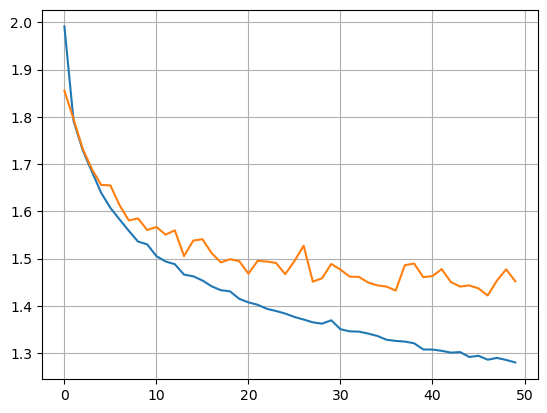

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [12]:
test_scores = model_fcn.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.4640 - accuracy: 0.4904 - 685ms/epoch - 2ms/step
Test loss: 1.4640438556671143
Test accuracy: 0.4903999865055084


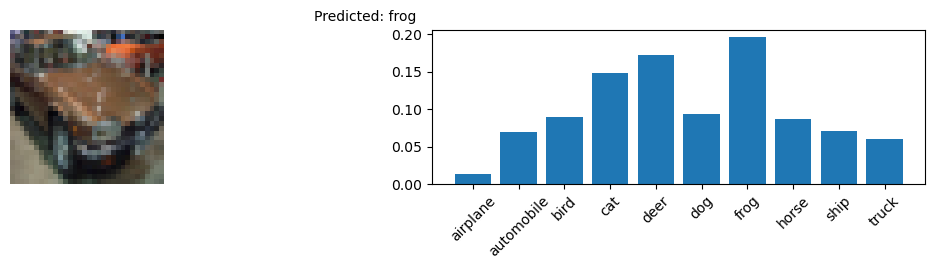

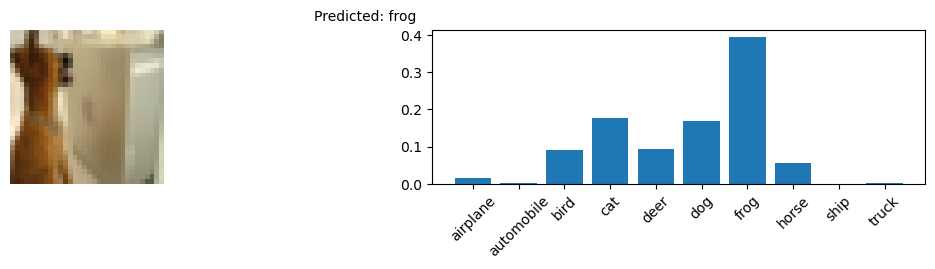

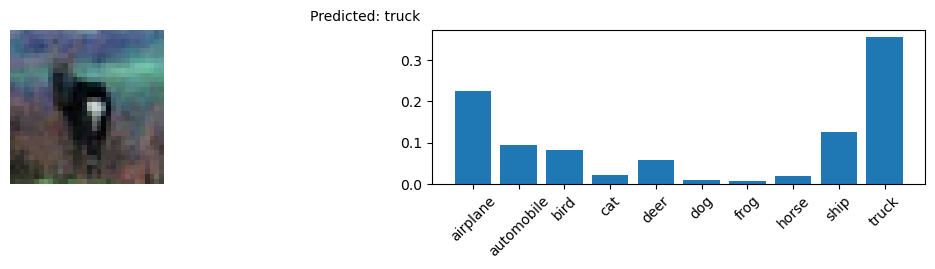

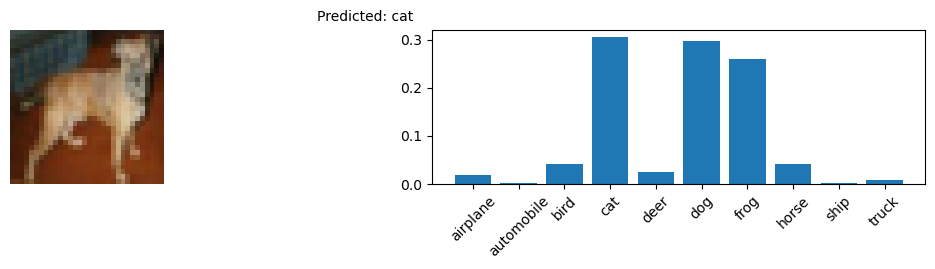

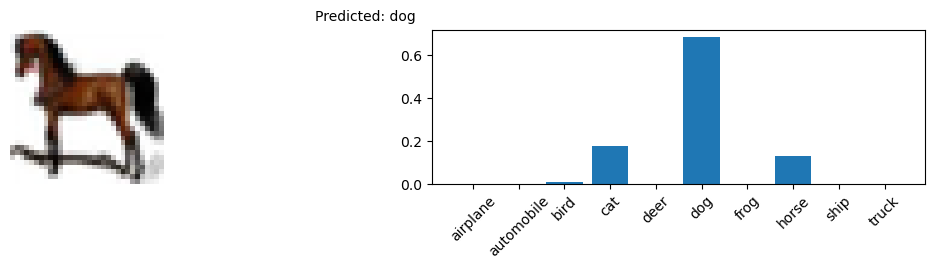

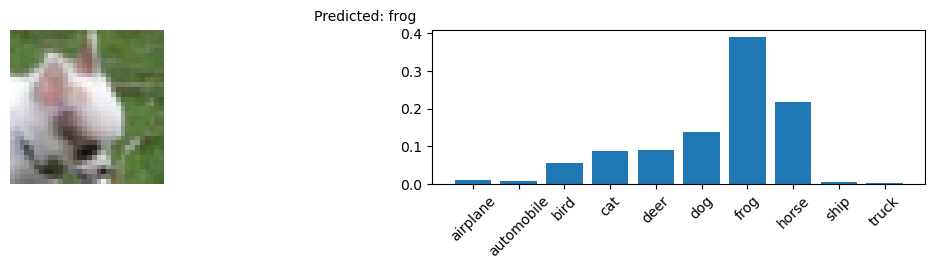

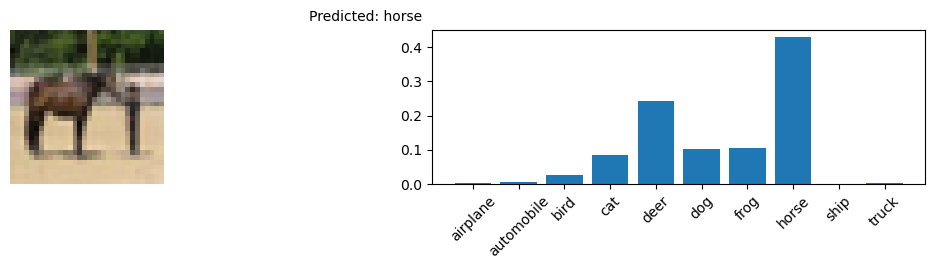

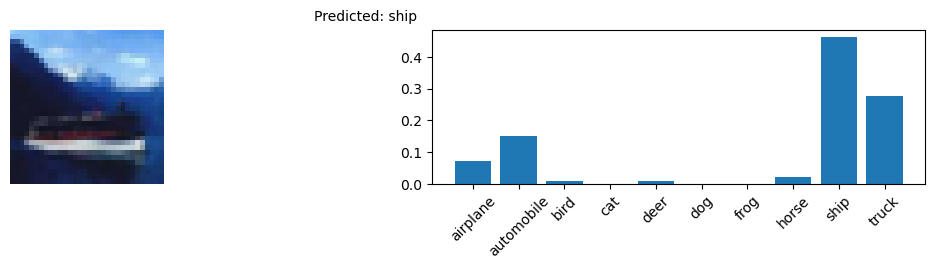

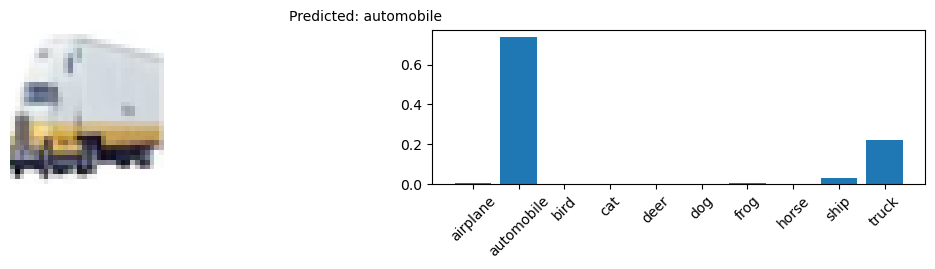

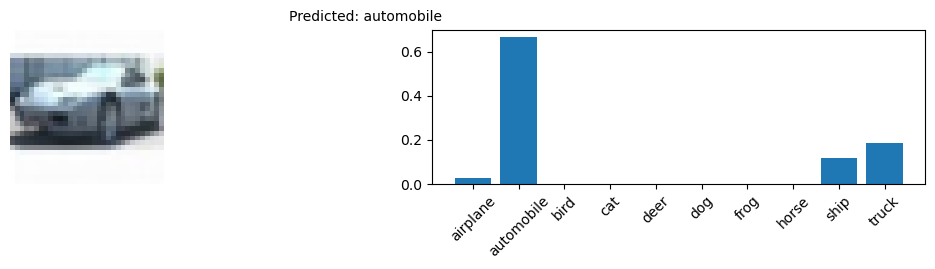

In [13]:
x = x_test
y = model_fcn(x)
start = 2000

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

for k in range(10):
    plt.figure(figsize=(14, 2))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    plt.axis("off")

    # Display the prediction probabilities
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.bar(ind, y[start + k].numpy().flatten())  # Flatten prediction array
    plt.xticks(ind, label_names, rotation=45)  # Map labels to class names

    # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = label_names[predicted_class_index]  # Map index to class name

    # Set the title as the predicted class
    plt.suptitle(f"Predicted: {predicted_class}", fontsize=10)

    plt.show()

# CNN


In [32]:
keras.datasets.cifar10.load_data()
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [33]:
# Create the model
inputs_cnn = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs_cnn)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_cnn = keras.Model(inputs=inputs_cnn, outputs=outputs, name="mnist_model_cnn")

In [34]:
model_cnn.summary()

Model: "mnist_model_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)          

In [35]:
batch_size = 256
epochs = 80

model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)
cnn_time = time.time() - start_time
cnn_score = model_cnn.evaluate(x_test, y_test, verbose=0)
# Save CNN results
np.savez("cnn_results.npz", accuracy=cnn_score[1], time=cnn_time, history=history.history)


Epoch 1/80
186/186 [==============================] - 15s 75ms/step - loss: 1.7941 - accuracy: 0.3523 - val_loss: 1.4981 - val_accuracy: 0.4676
Epoch 2/80
186/186 [==============================] - 16s 85ms/step - loss: 1.4583 - accuracy: 0.4776 - val_loss: 1.3604 - val_accuracy: 0.5272
Epoch 3/80
186/186 [==============================] - 16s 88ms/step - loss: 1.3567 - accuracy: 0.5198 - val_loss: 1.2816 - val_accuracy: 0.5592
Epoch 4/80
186/186 [==============================] - 16s 87ms/step - loss: 1.2983 - accuracy: 0.5433 - val_loss: 1.2280 - val_accuracy: 0.5840
Epoch 5/80
186/186 [==============================] - 16s 87ms/step - loss: 1.2500 - accuracy: 0.5635 - val_loss: 1.2190 - val_accuracy: 0.5772
Epoch 6/80
186/186 [==============================] - 17s 91ms/step - loss: 1.2020 - accuracy: 0.5793 - val_loss: 1.1294 - val_accuracy: 0.6188
Epoch 7/80
186/186 [==============================] - 16s 87ms/step - loss: 1.1678 - accuracy: 0.5920 - val_loss: 1.1119 - val_accuracy:

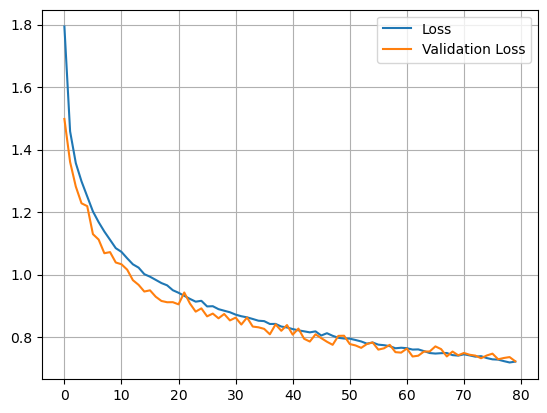

In [36]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [37]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.739380955696106
Test accuracy: 0.7452999949455261


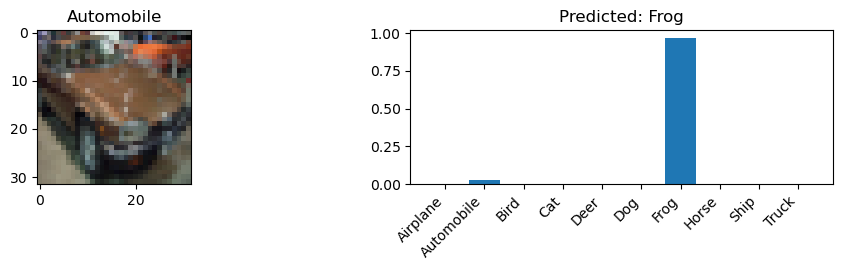

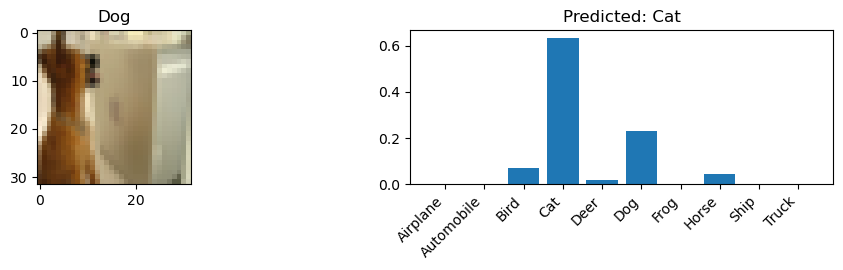

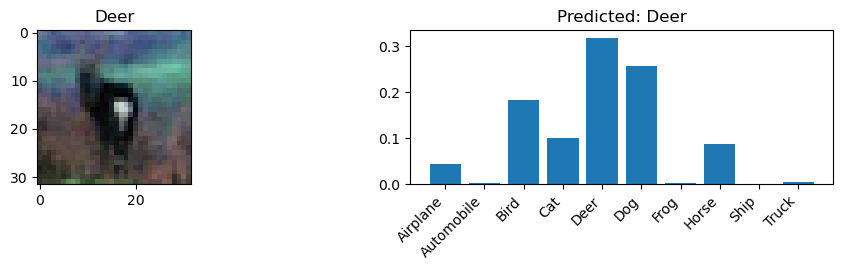

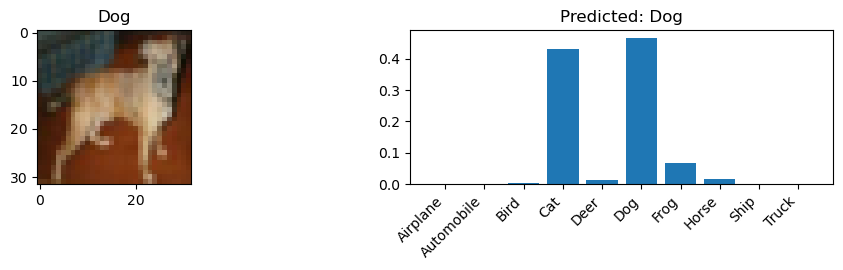

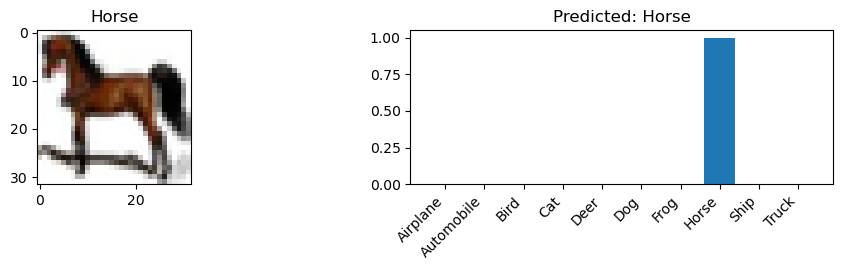

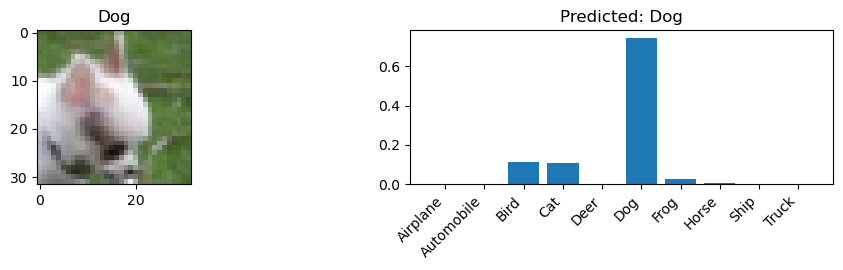

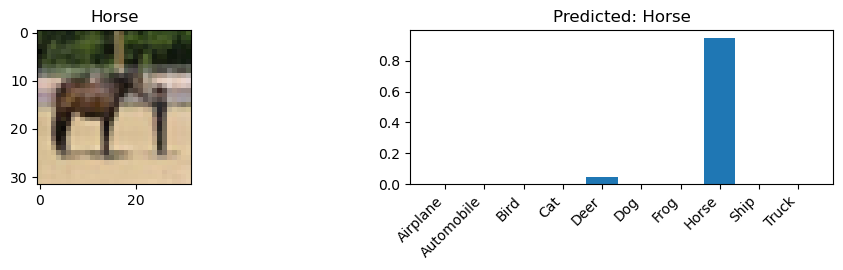

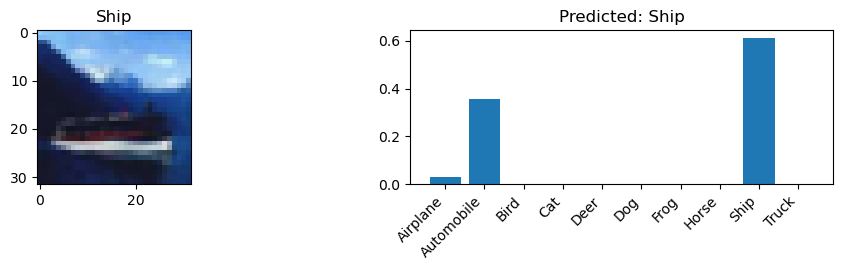

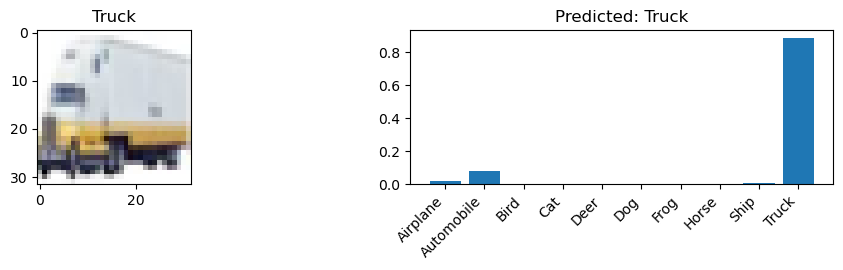

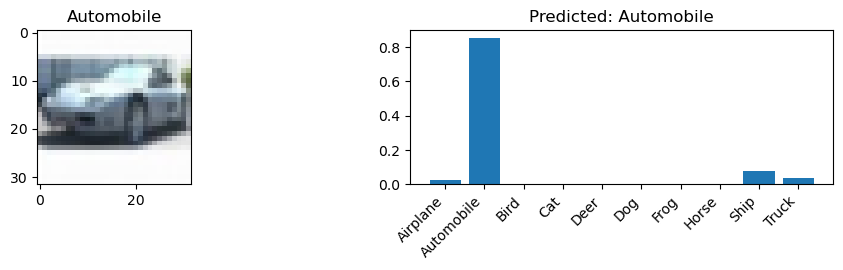

In [38]:
names = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 
         4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

x = x_test
y = model_cnn(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(12, 2))
    plt.subplot(1,2,1)
  
    plt.title(names[np.argmax(y_test[start+k])])
    plt.imshow(x[start+k])
    
    if x_test.shape[1] == 3072:
        x_test = x_test.reshape(-1, 32, 32, 3)
        
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
   
    plt.bar(ind, y[start+k].numpy().flatten()) 
    
   # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = names[predicted_class_index] 
    
     # Set the title as the predicted class
    plt.title(f"Predicted: {predicted_class}")
    
    # Tensorflow
    plt.xticks(range(10), [names[i] for i in range(10)], rotation=45, ha="right")

## FCN ja CNN tuloksien vertailu

FCN Test accuracy: 0.4912000000476837
CNN Test accuracy: 0.7452999949455261
FCN Training time: 2 minutes and 5 seconds
CNN Training time: 21 minutes and 49 seconds
FCN Number of parameters: 789258
CNN Number of parameters: 42442


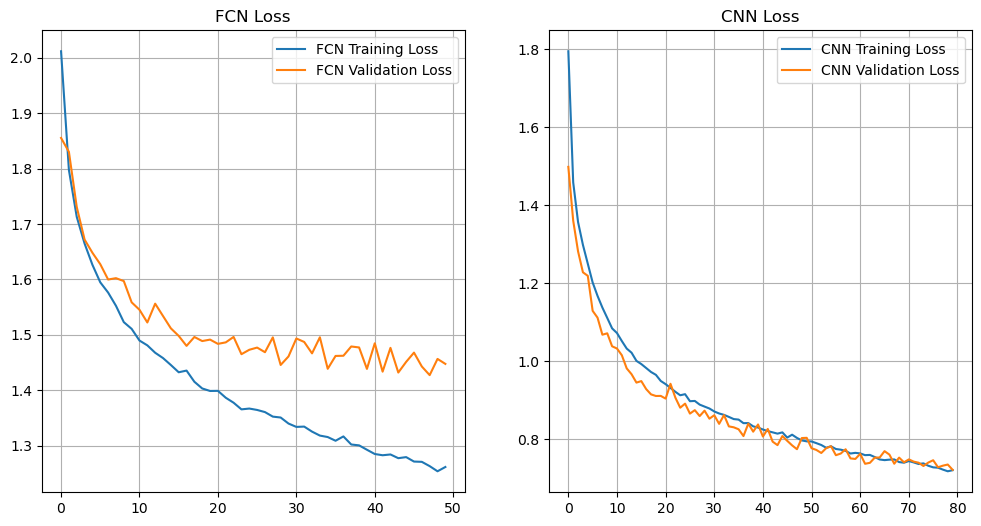

In [39]:
# Load results
fcn_results = np.load("fcn_results.npz", allow_pickle=True)
cnn_results = np.load("cnn_results.npz", allow_pickle=True)

fcn_accuracy = fcn_results["accuracy"]
fcn_time = fcn_results["time"]
fcn_history = fcn_results["history"].item()

cnn_accuracy = cnn_results["accuracy"]
cnn_time = cnn_results["time"]
cnn_history = cnn_results["history"].item()

# Convert training time to minutes and seconds
fcn_minutes, fcn_seconds = divmod(fcn_time, 60)
cnn_minutes, cnn_seconds = divmod(cnn_time, 60)

# Print results
print(f"FCN Test accuracy: {fcn_accuracy}")
print(f"CNN Test accuracy: {cnn_accuracy}")
print(f"FCN Training time: {int(fcn_minutes)} minutes and {int(fcn_seconds)} seconds")
print(f"CNN Training time: {int(cnn_minutes)} minutes and {int(cnn_seconds)} seconds")
print(f"FCN Number of parameters: {model_fcn.count_params()}")
print(f"CNN Number of parameters: {model_cnn.count_params()}")

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fcn_history['loss'], label='FCN Training Loss')
plt.plot(fcn_history['val_loss'], label='FCN Validation Loss')
plt.legend()
plt.grid()
plt.title('FCN Loss')

plt.subplot(1, 2, 2)
plt.plot(cnn_history['loss'], label='CNN Training Loss')
plt.plot(cnn_history['val_loss'], label='CNN Validation Loss')
plt.legend()
plt.grid()
plt.title('CNN Loss')

plt.show()